In [18]:
import json
import statistics

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utilities.storage import get_gradient_similarity_bm25_selected_file_path, get_gradient_similarity_bm25_selected_model_generated_file_path
from utilities.config.model import MODEL_NAME

In [19]:
def get_gradient_similarities_from_file(path_generation_function, sample_size: int):
    with open(path_generation_function(MODEL_NAME, sample_size)) as f:
        gradient_similarities = json.load(f)
        f.close()
        return gradient_similarities

In [20]:
def calculate_score(gradient_similarities: dict):
    correct_counter = 0
    bm25_correct_counter = 0

    size = len(gradient_similarities.keys())
    
    for original_id, similarities in gradient_similarities.items():
        most_similar_paraphrased_id = max(similarities, key=similarities.get)
        correct_counter += int(original_id == most_similar_paraphrased_id)

        bm25_most_similar_paraphrased_id = list(similarities.keys())[0]
        bm25_correct_counter += int(original_id == bm25_most_similar_paraphrased_id)
        
    return correct_counter / size, bm25_correct_counter / size

In [21]:
def get_wrong_decisions(gradient_similarities: dict):
    wrong_decisions = []
    
    for original_id, similarities in gradient_similarities.items():
        most_similar_paraphrased_id = max(similarities, key=similarities.get)
        if original_id != most_similar_paraphrased_id:
            wrong_decisions.append(original_id)

    return wrong_decisions

In [22]:
def get_mean_similarity_score_of_most_similar_samples(gradient_similarities: dict, mean_function = np.mean):
    highest_similarities = []
    
    for original_id, similarities in gradient_similarities.items():
        highest_similarities.append(max(similarities.values()))
        
    return mean_function(highest_similarities)

In [23]:
gradient_similarities_subset_100 = get_gradient_similarities_from_file(get_gradient_similarity_bm25_selected_file_path, 100)

In [24]:
paraphrased_score, bm25_score = calculate_score(gradient_similarities_subset_100)
paraphrased_score, bm25_score

(1.0, 0.99)

In [25]:
get_wrong_decisions(gradient_similarities_subset_100)

[]

In [26]:
# bm25 made a mistake at lime_70

In [27]:
get_mean_similarity_score_of_most_similar_samples(gradient_similarities_subset_100)

0.6546389150619507

In [28]:
get_mean_similarity_score_of_most_similar_samples(gradient_similarities_subset_100, statistics.median)

0.634360671043396

In [29]:
gradient_similarities_model_generated_subset_100 = get_gradient_similarities_from_file(get_gradient_similarity_bm25_selected_model_generated_file_path, 100)

In [30]:
paraphrased_model_generated_score, bm25_score = calculate_score(gradient_similarities_model_generated_subset_100)
paraphrased_model_generated_score, bm25_score

(0.21, 0.99)

In [31]:
get_wrong_decisions(gradient_similarities_model_generated_subset_100)

['lima_0',
 'lima_1',
 'lima_2',
 'lima_3',
 'lima_4',
 'lima_5',
 'lima_7',
 'lima_8',
 'lima_9',
 'lima_10',
 'lima_11',
 'lima_12',
 'lima_13',
 'lima_14',
 'lima_16',
 'lima_17',
 'lima_18',
 'lima_20',
 'lima_21',
 'lima_22',
 'lima_24',
 'lima_25',
 'lima_26',
 'lima_28',
 'lima_30',
 'lima_31',
 'lima_32',
 'lima_33',
 'lima_34',
 'lima_35',
 'lima_37',
 'lima_38',
 'lima_39',
 'lima_40',
 'lima_41',
 'lima_43',
 'lima_44',
 'lima_46',
 'lima_48',
 'lima_49',
 'lima_50',
 'lima_51',
 'lima_52',
 'lima_54',
 'lima_56',
 'lima_57',
 'lima_58',
 'lima_59',
 'lima_60',
 'lima_62',
 'lima_63',
 'lima_64',
 'lima_65',
 'lima_66',
 'lima_67',
 'lima_68',
 'lima_69',
 'lima_70',
 'lima_73',
 'lima_74',
 'lima_75',
 'lima_76',
 'lima_77',
 'lima_80',
 'lima_81',
 'lima_83',
 'lima_84',
 'lima_85',
 'lima_86',
 'lima_88',
 'lima_89',
 'lima_90',
 'lima_92',
 'lima_93',
 'lima_94',
 'lima_96',
 'lima_97',
 'lima_98',
 'lima_99']

In [32]:
get_mean_similarity_score_of_most_similar_samples(gradient_similarities_model_generated_subset_100)

0.022327972546918318

In [33]:
get_mean_similarity_score_of_most_similar_samples(gradient_similarities_model_generated_subset_100, statistics.median)

0.013680477626621723

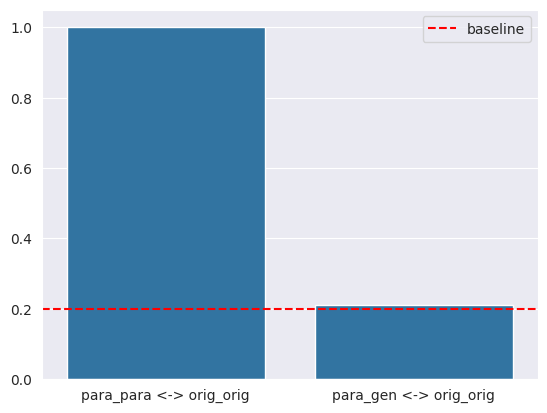

In [34]:
# create bar plot with paraphrased_score, paraphrased_model_generated_score, and horizontal line at 0.2 baseline
sns.barplot(x=["para_para <-> orig_orig", "para_gen <-> orig_orig"], y=[paraphrased_score, paraphrased_model_generated_score])

plt.axhline(y=0.2, color='r', linestyle='--', label="baseline")
plt.legend()
plt.show()

In [35]:
# optional: bm25 over query and answer

"""
Einteilung der Layer (attention layer, feed-forward layer, layer norm)
"""

'\nEinteilung der Layer (attention layer, feed-forward layer, layer norm)\n'